# Part I - Loan Data From Prosper Exploration
## by Madaki Fatsen Timon

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
>The data dictionary to understand the [81 variables](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

> In this exploration, we seek to answer the following questions:
> 1. What factors affect a loan’s outcome status?
> 2. What affects the borrower’s APR or interest rate?
> 3. Are there differences between loans depending on how large the original loan amount was?


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
import seaborn as sb

%matplotlib inline

> Load in dataset, describing its properties through the following questions below.

In [2]:
#load the dataset into loan_df dataframe
loan_df = pd.read_csv('./prosperLoanData.csv')

### Structure of the dataset

In [37]:
#displaying the first 5 rows to get a view of the data
loan_df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [38]:
#display the number of rows and columns
loan_df.shape

(113937, 81)

In [39]:
#displaying 5 randoms rows of data
loan_df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2575,478A3554650943118125413,618229,2012-07-29 15:28:52.883000000,NaN,60,Current,NaN,0.20931,0.1852,0.1752,...,-177.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,190
104253,0F38353018357629650C17D,534485,2011-10-21 08:42:21.970000000,NaN,12,Completed,2012-03-10 00:00:00,0.15077,0.0929,0.0829,...,-3.75,0.0,0.0,0.0,0.0,1.0,1,0,0.0,22
75672,6F0634110328596799F2C72,268928,2008-01-21 09:57:22.657000000,E,36,Completed,2011-01-13 00:00:00,0.16978,0.1481,0.1381,...,-32.41,0.0,0.0,0.0,0.0,1.0,1,1,100.0,19
45653,AD873558307660171B78157,639662,2012-09-15 09:50:46.843000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-24.13,0.0,0.0,0.0,0.0,1.0,0,0,0.0,32
38503,57A13519067633337B053C0,511358,2011-06-13 07:25:17.257000000,NaN,36,Chargedoff,2011-11-26 00:00:00,0.35643,0.3199,0.3099,...,0.00,0.0,3500.0,3500.0,0.0,1.0,0,0,0.0,22


In [40]:
#displaying the last 5 rows to get a view of the data
loan_df.tail(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [41]:
#display a summary of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [42]:
#display total number of duplicated values
loan_df['ListingNumber'].duplicated().sum()

871

In [43]:
# drop duplicates values with reference to listingkey and listingnumber index
loan_df.drop_duplicates(['ListingKey','ListingNumber'],keep='first',inplace=True)

In [4]:
#choosing only the needed variables
loan_df_needed = loan_df[['Term', 'LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus',
                         'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                         'MonthlyLoanPayment', 'DebtToIncomeRatio', 'IncomeVerifiable']]

In [45]:
#display 5 random records of the new dataframe
loan_df_needed.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,IncomeVerifiable
96906,60,Current,0.35838,0.3304,3,RI,Police Officer/Correction Officer,Employed,"$50,000-74,999",5416.666667,4000,136.98,0.21,True
2887,36,Current,0.12274,0.0949,1,WI,Truck Driver,Employed,"$100,000+",8750.000000,20000,640.57,0.22,True
93283,36,Completed,0.11957,0.1050,0,AZ,Professional,Full-time,"$50,000-74,999",5416.666667,1200,39.00,0.05,True
15934,36,Completed,0.15094,0.1295,1,OR,Other,Employed,"$25,000-49,999",3750.000000,3000,0.00,0.18,True
70950,36,Chargedoff,0.11445,0.1075,0,NaN,Sales - Commission,Not available,Not displayed,3541.666667,8000,260.96,0.20,True


In [46]:
#display a summary of the new dataframe
loan_df_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113066 non-null  int64  
 1   LoanStatus                 113066 non-null  object 
 2   BorrowerAPR                113041 non-null  float64
 3   BorrowerRate               113066 non-null  float64
 4   ListingCategory (numeric)  113066 non-null  int64  
 5   BorrowerState              107551 non-null  object 
 6   Occupation                 109537 non-null  object 
 7   EmploymentStatus           110811 non-null  object 
 8   IncomeRange                113066 non-null  object 
 9   StatedMonthlyIncome        113066 non-null  float64
 10  LoanOriginalAmount         113066 non-null  int64  
 11  MonthlyLoanPayment         113066 non-null  float64
 12  DebtToIncomeRatio          104594 non-null  float64
 13  IncomeVerifiable           11

In [47]:
#display the number of null or na values
loan_df_needed.isna().sum()

Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3529
EmploymentStatus             2255
IncomeRange                     0
StatedMonthlyIncome             0
LoanOriginalAmount              0
MonthlyLoanPayment              0
DebtToIncomeRatio            8472
IncomeVerifiable                0
dtype: int64

In [48]:
#display total number of duplicated values
loan_df_needed.duplicated().sum()

25

In [49]:
#drop remaing duplicates
loan_df_needed.drop_duplicates(inplace=True)

/tmp/ipykernel_3921/1852079456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_needed.drop_duplicates(inplace=True)


In [50]:
#check if changes took effect
loan_df_needed.duplicated().sum()

0

In [51]:
#display a descriptive statistics of the new dataset
loan_df_needed.describe()

,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio
count,113041.000000,113016.000000,113041.000000,113041.000000,1.130410e+05,113041.000000,113041.000000,104588.000000
mean,40.801019,0.218965,0.192932,2.777072,5.605763e+03,8315.751931,271.959030,0.276045
std,10.422279,0.080471,0.074906,3.998516,7.496051e+03,6237.235103,192.559374,0.553751
min,12.000000,0.006530,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,1.000000,3.200000e+03,4000.000000,130.950000,0.140000
50%,36.000000,0.209840,0.184000,1.000000,4.666667e+03,6300.000000,217.420000,0.220000
75%,36.000000,0.283860,0.250600,3.000000,6.825000e+03,12000.000000,370.570000,0.320000
max,60.000000,0.512290,0.497500,20.000000,1.750003e+06,35000.000000,2251.510000,10.010000


In [52]:
#rename ListingCategory (numeric) to ListingCategoryNumeric
loan_df_needed.rename(columns={'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

/tmp/ipykernel_3921/2626676917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_needed.rename(columns={'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)


In [53]:
#Check if changes took place
list(loan_df_needed)

['Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'ListingCategoryNumeric',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'StatedMonthlyIncome',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'DebtToIncomeRatio',
 'IncomeVerifiable']

In [54]:
# Fill NaN values in EmploymentStatus column with Not available
loan_df_needed['EmploymentStatus'].fillna('Not available',inplace=True)

/tmp/ipykernel_3921/3414485999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_needed['EmploymentStatus'].fillna('Not available',inplace=True)


In [5]:
# Fill NaN values in Occupation column with Other
loan_df_needed['Occupation'].fillna('Other',inplace=True)

/tmp/ipykernel_7798/1116092973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_needed['Occupation'].fillna('Other',inplace=True)


In [56]:
#Check if changes took place
loan_df_needed.isna().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                 25
BorrowerRate                 0
ListingCategoryNumeric       0
BorrowerState             5515
Occupation                   0
EmploymentStatus             0
IncomeRange                  0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
DebtToIncomeRatio         8453
IncomeVerifiable             0
dtype: int64

In [57]:
#drop all null values
loan_df_needed=loan_df_needed.dropna()

In [58]:
#Check if changes took place
loan_df_needed.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategoryNumeric    0
BorrowerState             0
Occupation                0
EmploymentStatus          0
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio         0
IncomeVerifiable          0
dtype: int64

In [3]:
#check the final structure of my dataset
loan_df_needed.shape

(99145, 15)

In [60]:
#display the individual values and their corresponding counts
loan_df_needed['Occupation'].value_counts()

Other                          24004
Professional                   12340
Computer Programmer             3987
Executive                       3870
Teacher                         3485
                               ...  
Student - College Sophomore       47
Student - College Freshman        31
Judge                             22
Student - Community College       19
Student - Technical School        10
Name: Occupation, Length: 68, dtype: int64

In [61]:
#display the unique values found in the occupation column
loan_df_needed['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Construction', 'Computer Programmer', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Not available', 'Teacher', 'Clergy', 'Accountant/CPA',
       'Attorney', 'Nurse (RN)', 'Analyst', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Truck Driver', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Realtor', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Landscaping', 'Tradesman - Carpenter',
       'Bus Driver', 'Tradesman - Plumber', 'Architect',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - Colle

In [62]:
#display the individual values and their corresponding counts
loan_df_needed['IncomeRange'].value_counts()

$25,000-49,999    28981
$50,000-74,999    28674
$100,000+         15778
$75,000-99,999    15709
$1-24,999          6096
Not displayed      3851
Not employed         56
Name: IncomeRange, dtype: int64

In [63]:
#display the individual values and their corresponding counts
loan_df_needed['ListingCategoryNumeric'].value_counts().sort_values()

12       45
17       50
10       82
9        83
8       188
11      198
16      289
5       604
19      718
20      724
18      785
14      794
15     1390
13     1779
4      2259
6      2356
3      5174
2      6915
7      9486
0     11234
1     53992
Name: ListingCategoryNumeric, dtype: int64

In [64]:
# Listing Category Numeric Labels.
list_numeric_def = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 
                    5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                    11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                    15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

In [65]:
'''
creating a list, loop over dataset by checking each numeric value on the ListingCategoryNumeric column to list_numeric_def
dictionary and appending the corresponding label to the list
'''

label_list=[]
for i in range(loan_df_needed.shape[0]):
    for j in range(len(list_numeric_def)):
        if loan_df_needed['ListingCategoryNumeric'].values[i] == list(list_numeric_def.keys())[j]:
            label_list.append(list(list_numeric_def.values())[j])

In [67]:
# adding ListingCategoryLabels as a new column
loan_df_needed['ListingCategoryLabels'] = label_list

In [68]:
#check if new column has been added
list(loan_df_needed)

['Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'ListingCategoryNumeric',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'StatedMonthlyIncome',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'DebtToIncomeRatio',
 'IncomeVerifiable',
 'ListingCategoryLabels']

### What is the structure of your dataset?

> After all wrangling acts, there are 99,145 loan data records in the dataset with 15 features.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest for this exploration includes LoanStatus, BorrowerAPR, BorrowerRate and LoanOriginalAmount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> StatedMonthlyIncome, ListingCategoryNumeric, EmploymentStatus, IncomeRange and MonthlyLoanPayment will support the exploration of LoanStatus. Term, LoanOriginalAmount and ListingCategoryNumeric aid in the exploration of BorrowerAPR and BorrowerRate. Term, IncomeRange and IncomeVerifiable will aid the investigation of LoanOriginalAmount.

## Univariate Exploration



In [43]:
#plotHistogram function definition
def plotHistogram(x_var, xlabel, ylabel, title, bin_edges):
    plt.figure(figsize=[8, 6])
    plt.hist(data = loan_df_needed, x = x_var, bins = bin_edges)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [54]:
#plotBarChart function definition
def plotBarChart(x_var, xlabel, ylabel, title):
    plt.figure(figsize=[6, 4])
    base_color = sb.color_palette()[0]
    status_order = loan_df_needed[x_var].value_counts().index
    sb.countplot(data = loan_df_needed, x = x_var, color = base_color, order = status_order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90);

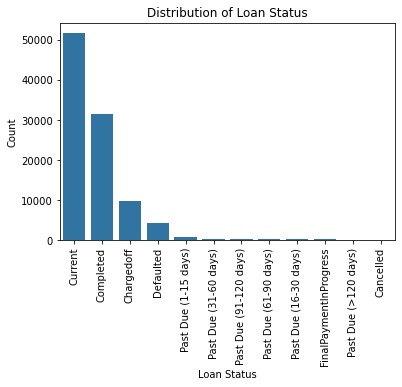

In [55]:
#plotting a bar chart of loan status
plotBarChart('LoanStatus', 'Loan Status', 'Count', 'Distribution of Loan Status')

We can observe that most of the loans (totalling 51,712) have the current status indicating that the are still being serviced followed by the completed status (totalling 31486). The cancelled status has the lowest frequency (totalling 2)

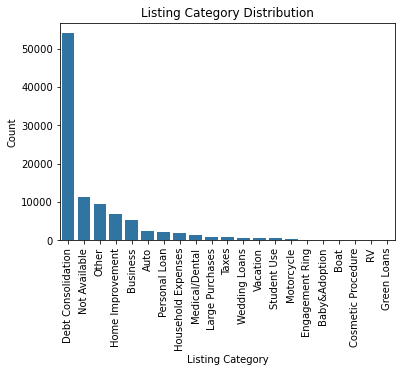

In [79]:
#plotting a barchart for Listing Category
plotBarChart('ListingCategoryLabels', 'Listing Category', 'Count', 'Listing Category Distribution')

Listing Category for obtaining the loan has 'DebtConsolidation' with the highest count(53,992). 'Not Available' is the second listing category with the highest number of counts(11,234), followed by other listing category with 'Green Loan' having the lowest counts of 45.

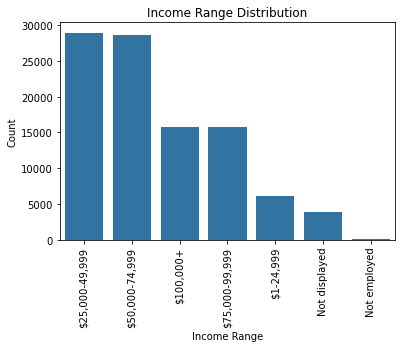

In [80]:
#plotting IncomeRange Barchat to show its distribution
plotBarChart('IncomeRange', 'Income Range', 'Count', 'Income Range Distribution')

Income range of $ 25,000 - $ 49,999 has the highest count, followed closely by income range of $ 50,000 - $ 74,999 and Not Employed with the least counts

In [10]:
print(loan_df_needed['BorrowerAPR'].min())
print(loan_df_needed['BorrowerAPR'].max())

0.00653
0.42395


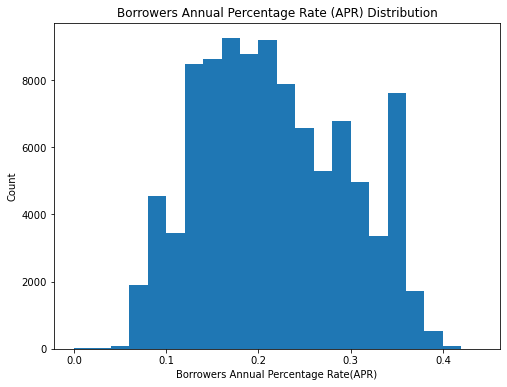

In [44]:
#Plotting histogram for BorrowerAPR
bin_edges = np.arange(0, loan_df_needed['BorrowerAPR'].max()+0.02, 0.02)
plotHistogram('BorrowerAPR', 'Borrowers Annual Percentage Rate(APR)', 'Count', 'Borrowers Annual Percentage Rate (APR) Distribution', bin_edges)

It can be seen that Borrowers Annual Percentage Rate(APR) has a bimodal distribution between 0.15 and 0.25. The distribution is also right-skewed. It is oberved that there is a sudden rise between 0.33 and 0.37, perhaps at 0.35.

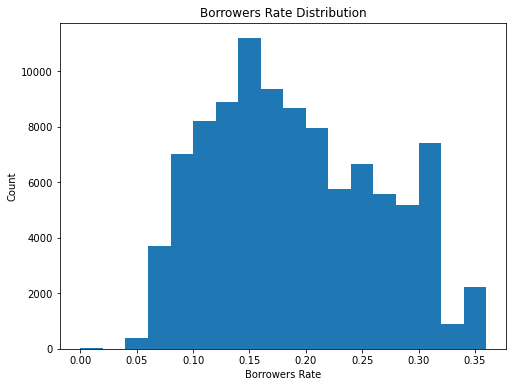

In [45]:
#Plotting histogram for Borrower Rate
bin_edges = np.arange(0, loan_df_needed['BorrowerRate'].max()+0.02, 0.02)
plotHistogram('BorrowerRate', 'Borrowers Rate', 'Count', 'Borrowers Rate Distribution', bin_edges)

BorrowerRate has a unimodal distribution at 0.15 with a decline and a rise between 0.25 and 0.33. It also appears right skewed

In [32]:
loan_df_needed['LoanOriginalAmount'].describe()

count    99145.000000
mean      8587.777488
std       6352.540153
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

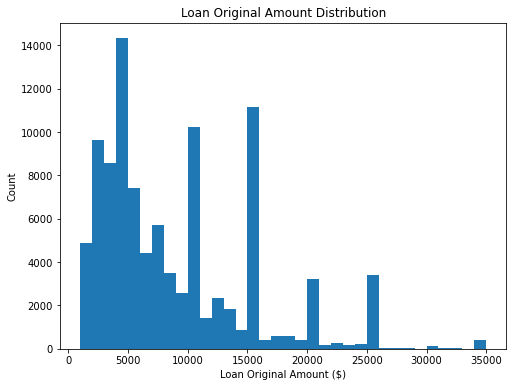

In [46]:
#Plotting histogram for Loan Original Amount
bin_edges = np.arange(1000, loan_df_needed['LoanOriginalAmount'].max()+1000, 1000)
plotHistogram('LoanOriginalAmount', 'Loan Original Amount ($)', 'Count', 'Loan Original Amount Distribution', bin_edges)

The loan original amount distribution appears right skewed. Its distribution is unimodal, with sudden rise between 9000 and 11000. Also, a sudden rise is noticed between 15000 and 16000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can observe that most of the loans (totalling 51,712) have the current status indicating that the are still being serviced followed by the completed status (totalling 31486). The cancelled status has the lowest frequency (totalling 2)

> Listing Category for obtaining the loan has 'DebtConsolidation' with the highest count(53,992). 'Not Available' is the second listing category with the highest number of counts(11,234), followed by other listing category with 'Green Loan' having the lowest counts of 45.

> Income range of 25,000− 49,999 has the highest count, followed closely by income range of 50,000− 74,999 and Not Employed with the least counts

> It can be seen that Borrowers Annual Percentage Rate(APR) has a bimodal distribution between 0.15 and 0.25. The distribution is also right-skewed. It is oberved that there is a sudden rise between 0.33 and 0.37, perhaps at 0.35.

> BorrowerRate has a unimodal distribution at 0.15 with a decline and a rise between 0.25 and 0.33. It also appears right skewed

> The loan original amount distribution appears right skewed. Its distribution is unimodal, with sudden rise between 9000 and 11000. Also, a sudden rise is noticed between 15000 and 16000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes, there were unusual distribution with sudden rises at some points. For the Listing Category distribution plot, we created a new column (ListingCategoryLabels) for clarity of plotting ListingCategoryNumeric values

## Bivariate Exploration


In [6]:
#myViolinPlot function
def myViolinPlot(x_axis, y_axis, base_color, xlabel, ylabel, title):
    sb.violinplot(data = loan_df_needed, x = x_axis, y = y_axis, color = base_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90);

In [7]:
#myBoxPlot function
def myBoxPlot(x_axis, y_axis, base_color, xlabel, ylabel, title):
    sb.boxplot(data = loan_df_needed, x = x_axis, y = y_axis, color = base_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90);

In [82]:
#myScatterPlot function
def myScatterPlot(x_axis, y_axis, xlabel, ylabel, title):
    sb.regplot(data = loan_df_needed, x = x_axis, y = y_axis, x_jitter=0.3, 
           scatter_kws={'alpha':1/20});
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [3]:
list(loan_df_needed)

['Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'ListingCategoryNumeric',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'StatedMonthlyIncome',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'DebtToIncomeRatio',
 'IncomeVerifiable']

In [7]:
base_color = sb.color_palette()[0]

In [8]:
#We will be selecting only 6 of loan status with the highest counts
loan_status_cats = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)']

# return the types of loan status with the categories and orderedness
loan_cats = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_cats)

# convert the "LoanStatus" column into an ordered categorical type using pandas.astype() 
loan_df_needed['LoanStatus'] = loan_df_needed['LoanStatus'].astype(loan_cats);

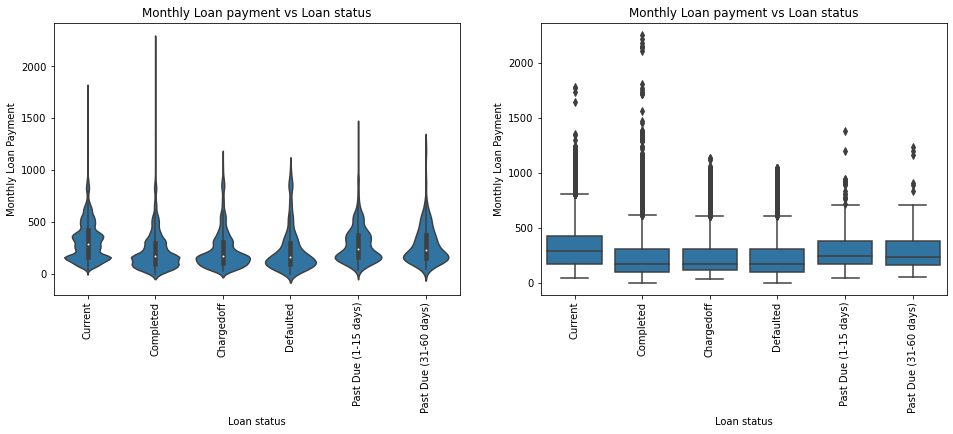

In [8]:
plt.figure(figsize = [16, 5])

# left: violin plot
plt.subplot(1, 2, 1)
#calling myViolinPlot function to plot MonthlyLoanPayment vs LoanStatus
myViolinPlot('LoanStatus', 'MonthlyLoanPayment', base_color, 'Loan status', 'Monthly Loan Payment',
             'Monthly Loan payment vs Loan status')

# right: box plot
plt.subplot(1, 2, 2)
#calling myBoxPlot function to plot MonthlyLoanPayment vs LoanStatus
myBoxPlot('LoanStatus', 'MonthlyLoanPayment', base_color, 'Loan status', 'Monthly Loan Payment', 
          'Monthly Loan payment vs Loan status')

> Violin plot on the left: the 'current' loans status have the highest median followed closely by 'Past Due(1-15 days)' loan status. The shape of the distribution, indicates that MonthlyLoanpayment of the 'current' loan status
are highly concentrated below and moderately concentrated above the median. The shape of the distribution, indicates that MonthlyLoanpayment of the 'Past Due(1-15 days)' loan status are highly concentrated below the median.

> Boxplot on the right: Outliers are indicated above the whiskers with dotted points


In [14]:
loan_df_needed['EmploymentStatus'].value_counts()

Employed         65168
Full-time        24118
Not available     3750
Other             3462
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: EmploymentStatus, dtype: int64

In [9]:
#picking a few of the employment status to work with and having the result in a new dataset
loan_df_needed_sub = loan_df_needed.loc[loan_df_needed['EmploymentStatus'].isin(['Employed', 'Other', 'Full-time', 'Not available', 
                                                          'Self-employed'])]


In [10]:
# adding EmploymentType column
loan_df_needed['EmploymentType'] = loan_df_needed['EmploymentStatus'].apply(lambda x:x.split()[0])
# fuel_econ['fuel'] = fuel_econ['fuelType'].apply(lambda x:x.split()[0])
loan_df_needed.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategoryNumeric,BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,IncomeVerifiable,ListingCategoryLabels,EmploymentType
0,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,330.43,0.17,True,Not Available,Self-employed
1,36,Current,0.12016,0.0920,2,CO,Professional,Employed,"$50,000-74,999",6125.000000,10000,318.93,0.18,True,Home Improvement,Employed
2,36,Completed,0.28269,0.2750,0,GA,Other,Not available,Not displayed,2083.333333,3001,123.32,0.06,True,Not Available,Not
3,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,"$25,000-49,999",2875.000000,10000,321.45,0.15,True,Motorcycle,Employed
4,36,Current,0.24614,0.2085,2,MN,Executive,Employed,"$100,000+",9583.333333,15000,563.97,0.26,True,Home Improvement,Employed


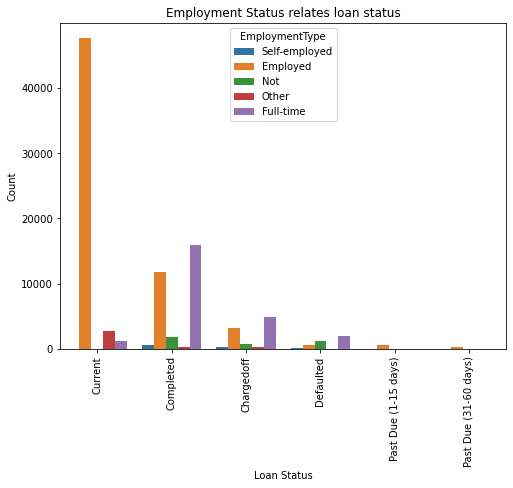

In [13]:
plt.figure(figsize=[8, 6])
sb.countplot(data = loan_df_needed, x = 'LoanStatus', hue = 'EmploymentType')
plt.title('Employment Status relates loan status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation = 90);

From the clustered barchart above, at the current loan status, we see that the employed are the majority servicing a loan, with the other employment status as the next and lastly followed by full time. At the completed loan status, the full-time employees having the highest count as having paid off their loan, followed by the employed.

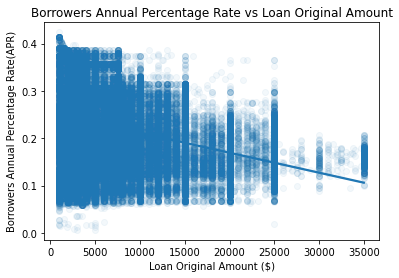

In [27]:
#Plotting a scatter plot for loan original amount and BorrowerAPR
myScatterPlot('LoanOriginalAmount', 'BorrowerAPR', 'Loan Original Amount ($)', 'Borrowers Annual Percentage Rate(APR)', 
              'Borrowers Annual Percentage Rate vs Loan Original Amount')

The regression line in this scatter plot shows a negative correlation between the Borrowers Annual Percentage Rate(APR) and the loan original amount. Most of the loan original amount between 1000 and 10,000 are possessed by borrowers with higher Annual Percentage Rate(APR). The plot also indicates that as the loan original amount increases, the borrowers Annual Percentage Rate(APR) decreases.

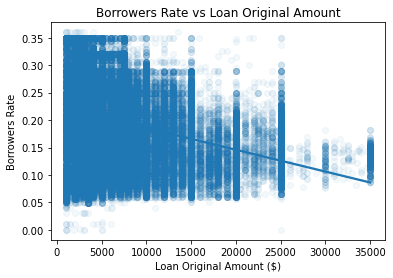

In [28]:
#Plotting a scatter plot for loan original amount and BorrowerRate
myScatterPlot('LoanOriginalAmount', 'BorrowerRate', 'Loan Original Amount ($)', 'Borrowers Rate', 
              'Borrowers Rate vs Loan Original Amount')

Also, there is a negative correlation between the Borrowers Rate and the loan original amount. Most of the loan original amount between 1000 and 10,000 are possessed by borrowers with higher Rate. The plot also indicates that as the loan original amount increases, the borrowers Rate decreases.

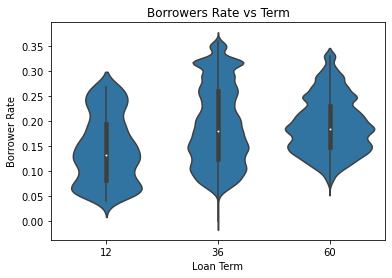

In [11]:
#calling myViolinPlot function to plot BorrowerRate vs Term
myViolinPlot('Term', 'BorrowerRate', base_color, 'Loan Term', 'Borrower Rate',
             'Borrowers Rate vs Term')
plt.xticks(rotation = 0);

The loan term with the highest median is 60 followed by 36 and lastly 12. The shape of the distribution (extremely wide in the middle for term 60) indicates the Borrowers Rate are highly concentrated around the median. That of term 36 are concentrated below the median

In [36]:
loan_df_needed['ListingCategoryLabels'].value_counts()

Debt Consolidation    53992
Not Available         11234
Other                  9486
Home Improvement       6915
Business               5174
Auto                   2356
Personal Loan          2259
Household Expenses     1779
Medical/Dental         1390
Large Purchases         794
Taxes                   785
Wedding Loans           724
Vacation                718
Student Use             604
Motorcycle              289
Engagement Ring         198
Baby&Adoption           188
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              45
Name: ListingCategoryLabels, dtype: int64

In [8]:
#We will be selecting only 5 of Listing Category Labels with the highest counts
listing_cats_labels = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement', 'Business']

# return the types of Listing Category Labels with the categories and orderedness
listing_cats = pd.api.types.CategoricalDtype(ordered=True, categories=listing_cats_labels)

# convert the "ListingCategoryLabels" column into an ordered categorical type using pandas.astype() 
loan_df_needed['ListingCategoryLabels'] = loan_df_needed['ListingCategoryLabels'].astype(listing_cats);

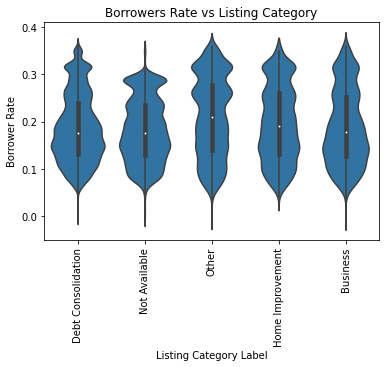

In [40]:
#calling myViolinPlot function to plot BorrowerRate vs Listing category
myViolinPlot('ListingCategoryLabels', 'BorrowerRate', base_color, 'Listing Category Label', 'Borrower Rate',
             'Borrowers Rate vs Listing Category')

The listing Category with the highest median is 'Other' and followed by 'Home Improvement'. The shape of the distribution for the 'Other' listing category shows a higher concentration of borrower rate above the median and even concentration below the median. For 'Home Improvement' listing, the distribution of borrower rate seems a bit evenly concentrated below the median and a high concentration above the median.

In [43]:
loan_df_needed['Term'].describe()

count    99145.000000
mean        41.188522
std         10.679246
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: Term, dtype: float64

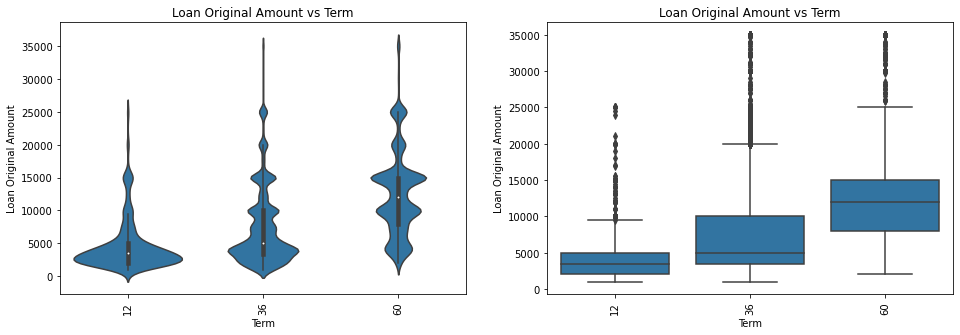

In [41]:
plt.figure(figsize = [16, 5])

# left: violin plot
plt.subplot(1, 2, 1)
#calling myViolinPlot function to plot LoanOriginalAmount vs Term
myViolinPlot('Term', 'LoanOriginalAmount', base_color, 'Term', 'Loan Original Amount',
             'Loan Original Amount vs Term')

# right: box plot
plt.subplot(1, 2, 2)
#calling myBoxPlot function to plot LoanOriginalAmount vs Term
myBoxPlot('Term', 'LoanOriginalAmount', base_color, 'Term', 'Loan Original Amount',
             'Loan Original Amount vs Term')

> Left: Violin plot; It indicated that Term 60 has the highest median with concentration of loan original amount spread highest above the median and moderately, slightly below the median. Term 36 has distribution of loan original amount highly concentrated around and slightly below the median. Term 12 shows distribution of loan original amount highly concentrated around the median

> Right: Box plot; it indicates outliers above the fourth quartile

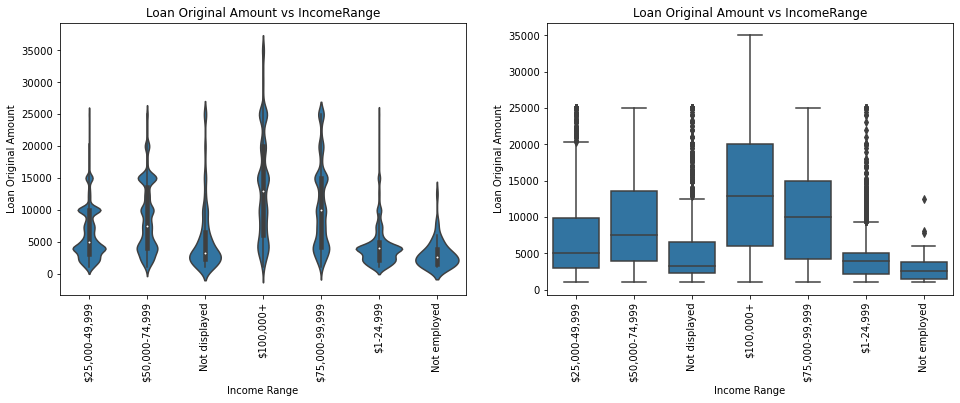

In [12]:
plt.figure(figsize = [16, 5])

# left: violin plot
plt.subplot(1, 2, 1)
#calling myViolinPlot function to plot LoanOriginalAmount vs Term
myViolinPlot('IncomeRange', 'LoanOriginalAmount', base_color, 'Income Range', 'Loan Original Amount',
             'Loan Original Amount vs IncomeRange')

# right: box plot
plt.subplot(1, 2, 2)
#calling myBoxPlot function to plot LoanOriginalAmount vs Term
myBoxPlot('IncomeRange', 'LoanOriginalAmount', base_color, 'Income Range', 'Loan Original Amount',
             'Loan Original Amount vs IncomeRange')

> Left: Violin plot; Income range of $100,000 has the highest median with concentration of loan original amount spread almost evenly below and above the median. 

> Right: Box plot; it indicates outliers above the fourth quartile of $ 25,000 - 49,999, Not displayed, 1 - 24,999 and Not employed



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As Term increases borrower rate increases. There is a positive correlation between these variables

> There is a negative correlation between the Borrowers Annual Percentage Rate(APR) and the loan original amount.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that there was no relationship between LoanStatus and StatedMonthlyIncome, hence the plot for this was deleted. On the other hand there was relationship between LoanStatus and MonthlyLoanPayment.

## Multivariate Exploration

In [38]:
#myMultivariateBarPlot function
def myMultivariateBarPlot(x_axis, y_axis, hue_val, title):
    plt.figure(figsize = [12,8])
    ax = sb.barplot(data = loan_df_needed, x = x_axis, y = y_axis, hue = hue_val)
    ax.legend(loc = 8, framealpha = 1, title = hue_val)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation = 15)
    plt.title(title);

In [41]:
#myMultivariateScatterPlot function
def myMultivariateScatterPlot(x_axis, y_axis,x_label, y_label, col_val, title):
    g = sb.FacetGrid(data = loan_df_needed, col = col_val, height = 5, col_wrap = 3)
    g.map(plt.scatter, x_axis, y_axis, alpha = 1/20)
    g.add_legend()
    g.set_xlabels(x_label)
    g.set_ylabels(y_label)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(title);

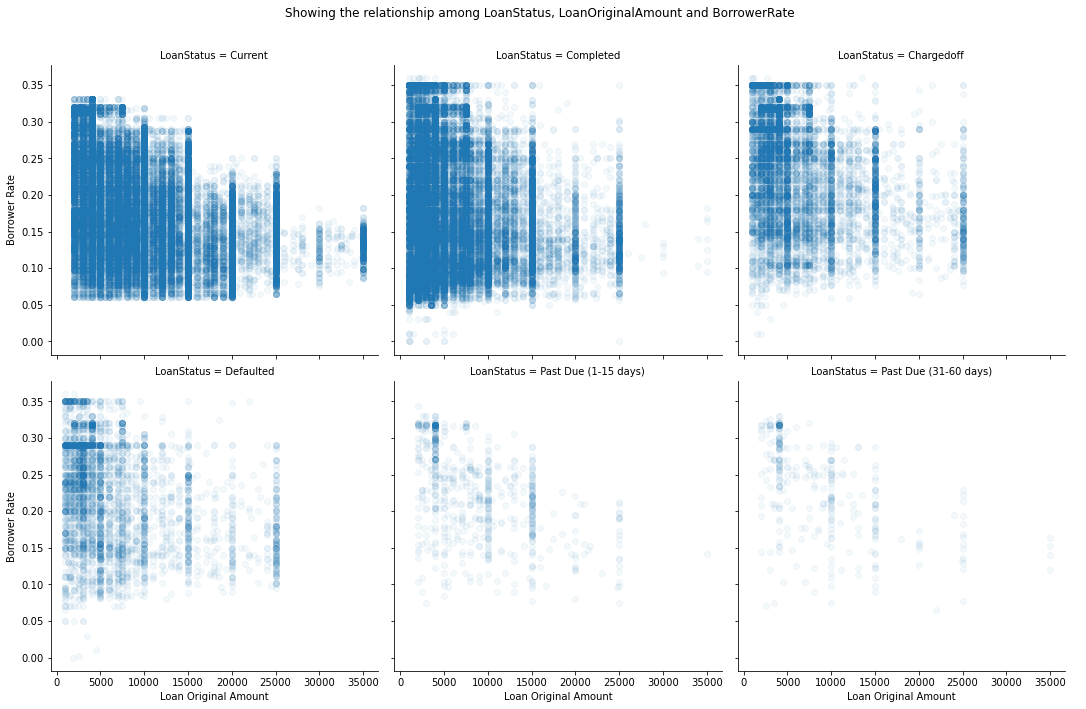

In [43]:
#multivariate scatter Plot to Show the relationship among LoanStatus, LoanOriginalAmount and BorrowerRate'
myMultivariateScatterPlot('LoanOriginalAmount', 'BorrowerRate', 'Loan Original Amount', 'Borrower Rate', 
                          'LoanStatus', 'Showing the relationship among LoanStatus, LoanOriginalAmount and BorrowerRate')


The above plot indicates that for each of the loan status, there is a negative correlation between BorrowerRate and LoanOriginalAmount. It is also observe that the distribution (of BorrowerRate and LoanOriginalAmount) in completed and current loan status is highly concentrated.

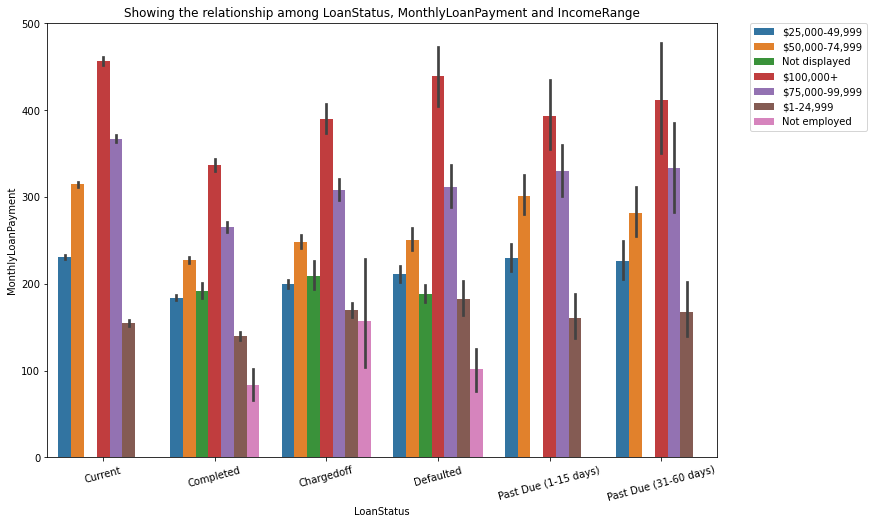

In [39]:
#multivariate bar plot Plot to Show the relationship among LoanStatus, MonthlyLoanPayment and IncomeRange
myMultivariateBarPlot('LoanStatus', 'MonthlyLoanPayment', 'IncomeRange',
                      'Showing the relationship among LoanStatus, MonthlyLoanPayment and IncomeRange')

IncomeRange of 100,000+ dollars has the highest MonthlyLoanPayment for all LoanStatus. Also, IncomeRange of 75,000 - 99,999 dollars has the second highest frequency of MonthlyLoanPayment for all the LoanStatus. This indicates that higher IncomeRange suggest high MonthlyLoanPayment for all Loan status

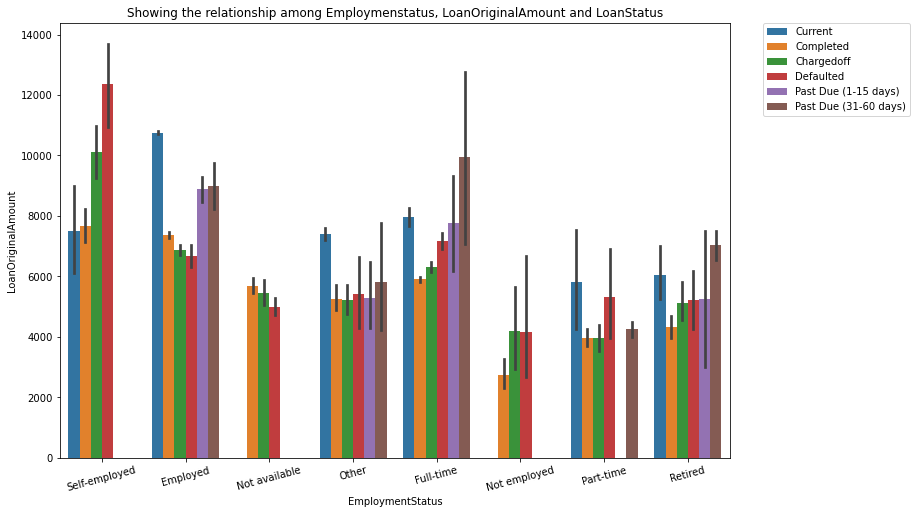

In [40]:
#multivariate bar plot Plot to Show the relationship among LoanOriginalAmount, EmploymentStatus and LoanStatus'
myMultivariateBarPlot('EmploymentStatus', 'LoanOriginalAmount', 'LoanStatus',
                      'Showing the relationship among Employmenstatus, LoanOriginalAmount and LoanStatus')

Under Self-employed, 'Defaulted' Loan status has the highest LoanOriginalAmount with 'current' Loan status as the least. looking at Employed, 'current' loan status has the highest value of LoanOriginalAmount with 'Defaulted' Loan status having the least value. Under Not Employed, 'chargedoff' has the highest value of LoanOriginalAmount, and 'completed' with the least value.

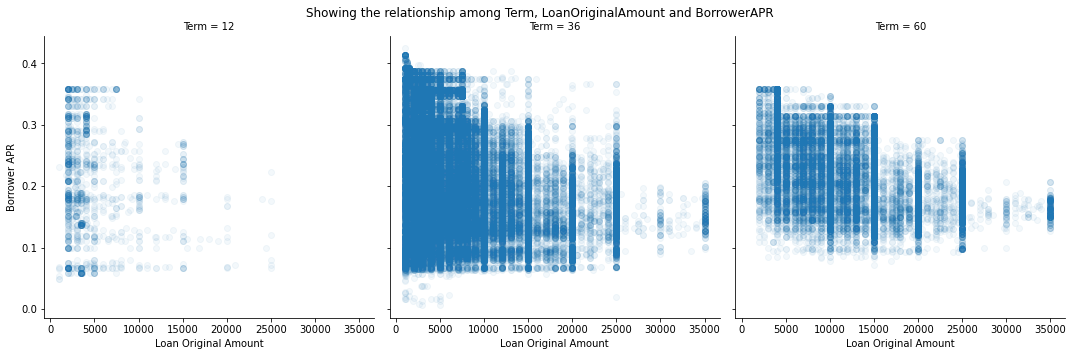

In [44]:
#multivariate scatter plot Plot to Show the relationship among LoanOriginalAmount, BorrowerAPR and Term'
myMultivariateScatterPlot('LoanOriginalAmount', 'BorrowerAPR', 'Loan Original Amount', 'Borrower APR', 
                          'Term', 'Showing the relationship among Term, LoanOriginalAmount and BorrowerAPR')


There is a negative correlation between Borrower APR and Loan Original Amount as it relates all the loan Term. The density of 'Term 36' plot suggests that most of the loan collected has a term of 36. Term 12 has the least number of loan collected.

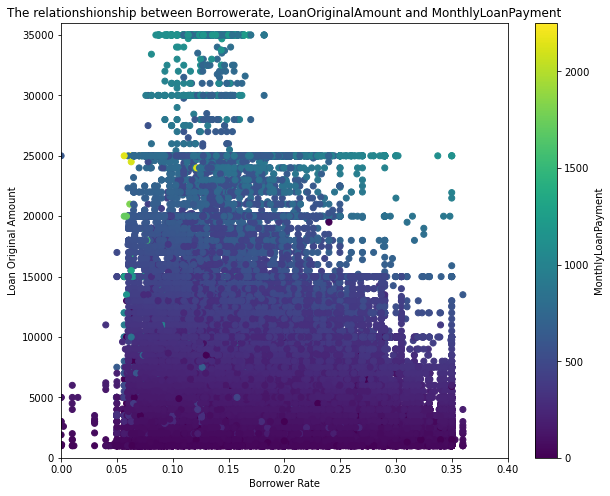

In [37]:
#multivariate scatter plot Plot to Show the relationship among LoanOriginalAmount, MonthlyLoanPayment and BorrowerRate'
plt.figure(figsize = [10,8])
plt.scatter(data = loan_df_needed, x = 'BorrowerRate', y = 'LoanOriginalAmount', c = 'MonthlyLoanPayment')
plt.colorbar(label = 'MonthlyLoanPayment')
plt.xlim(0,0.4)
plt.ylim(0,36000)
plt.xlabel('Borrower Rate')
plt.ylabel('Loan Original Amount');
plt.title('The relationshionship between Borrowerate, LoanOriginalAmount and MonthlyLoanPayment');

From the plot we observe that the highest Monthly Loan Payment of 2251.51 was paid in for loan Original amount of 25000 for a rate between 0.05 and 0.10. Most of Monthly Loan Payment value falls between 500 and 1500 dollars.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The plot showing the relationship between loan status, borrower rate and loan original amount indicates that for each of the loan status, there is a negative correlation between BorrowerRate and LoanOriginalAmount.

> It indicated that higher IncomeRange suggests high MonthlyLoanPayment for all Loan status

> There is a negative correlation between Borrower APR and Loan Original Amount as it relates all the loan Term

### Were there any interesting or surprising interactions between features?

> Most of Monthly Loan Payment value falls between 500 and 1500 dollars.


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> After this loan dataset exploration, the main findings are listed thus:
1. The reason why most of the loans were collected was for debt consolidation.
2. Most of the loans collected was of incomeRange 25,000 − 49,999 dollars
3. Most of the loans were currently being serviced.
4. There is a negative correlation between LoanOriginalAmount and BorrowerRate/BorrowerAPR, indicating the higher the loan amount the lower the borrower rate/APR
5. Borrowers Annual Percentage Rate has a bimodal distribution between 0.15 and 0.25
6. Borrowers Rate has a unimodal distribution at 0.15
7. IncomeRange of 100,000+ dollars has the highest MonthlyLoanPayment for all LoanStatus.
8. Loan term of 12 has the least number of loan collected, suggesting only few loans were collected with a short duration of payment
9. The highest MonthlyLoanPayment amount recorded in this dataset is 2251.51 dollars for loan amount of 25000 dollars with rates between 0.05 and 0.10.

> To reach the above conclusion, the dataset was explored with code, cleaned and tidied. We went further to pick features of interest and features that maybe factors affecting our interested-features for exploration. For visualization exploration, we started with univariate exploration, then bivariate exploration and finally, multivariate exploration.

## Reference
> https://mode.com/blog/violin-plot-examples/

> https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot